In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import datetime
import matplotlib.cm as cm
from sklearn.decomposition import PCA
import matplotlib as mpl
import missingno as missingno


# Customer Segmentation Analysis

#### Importing Data Set

In [2565]:
marketingCampData= pd.read_csv('marketing_campaign.csv') 
marketingCampData

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04/09/2012       58       635  ...                  7   
1            1  08/03/2014       38        11  ...                  5   
2            0  21/08/2013       26       426  ...                  4   
3            0  10/02/2014       26        11  ...                  6   
4            0  19/01/2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13/06/2013       46       709  ...                  5   
2236         1  10/06/2014       56       406  ...                  7   
2237         0  25/01/2014       91       908  ...                  6   
2238         1  24/01/2014        8       428  ...                  3   
2239         1  15/10/2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [2566]:
marketingCampData.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

## Data Cleaning

#### Plotting Missigno Matrix to finding missing values in the feature

#### Code Reference= https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

Text(0.5, 1.0, 'Plot to Find Missing Values')

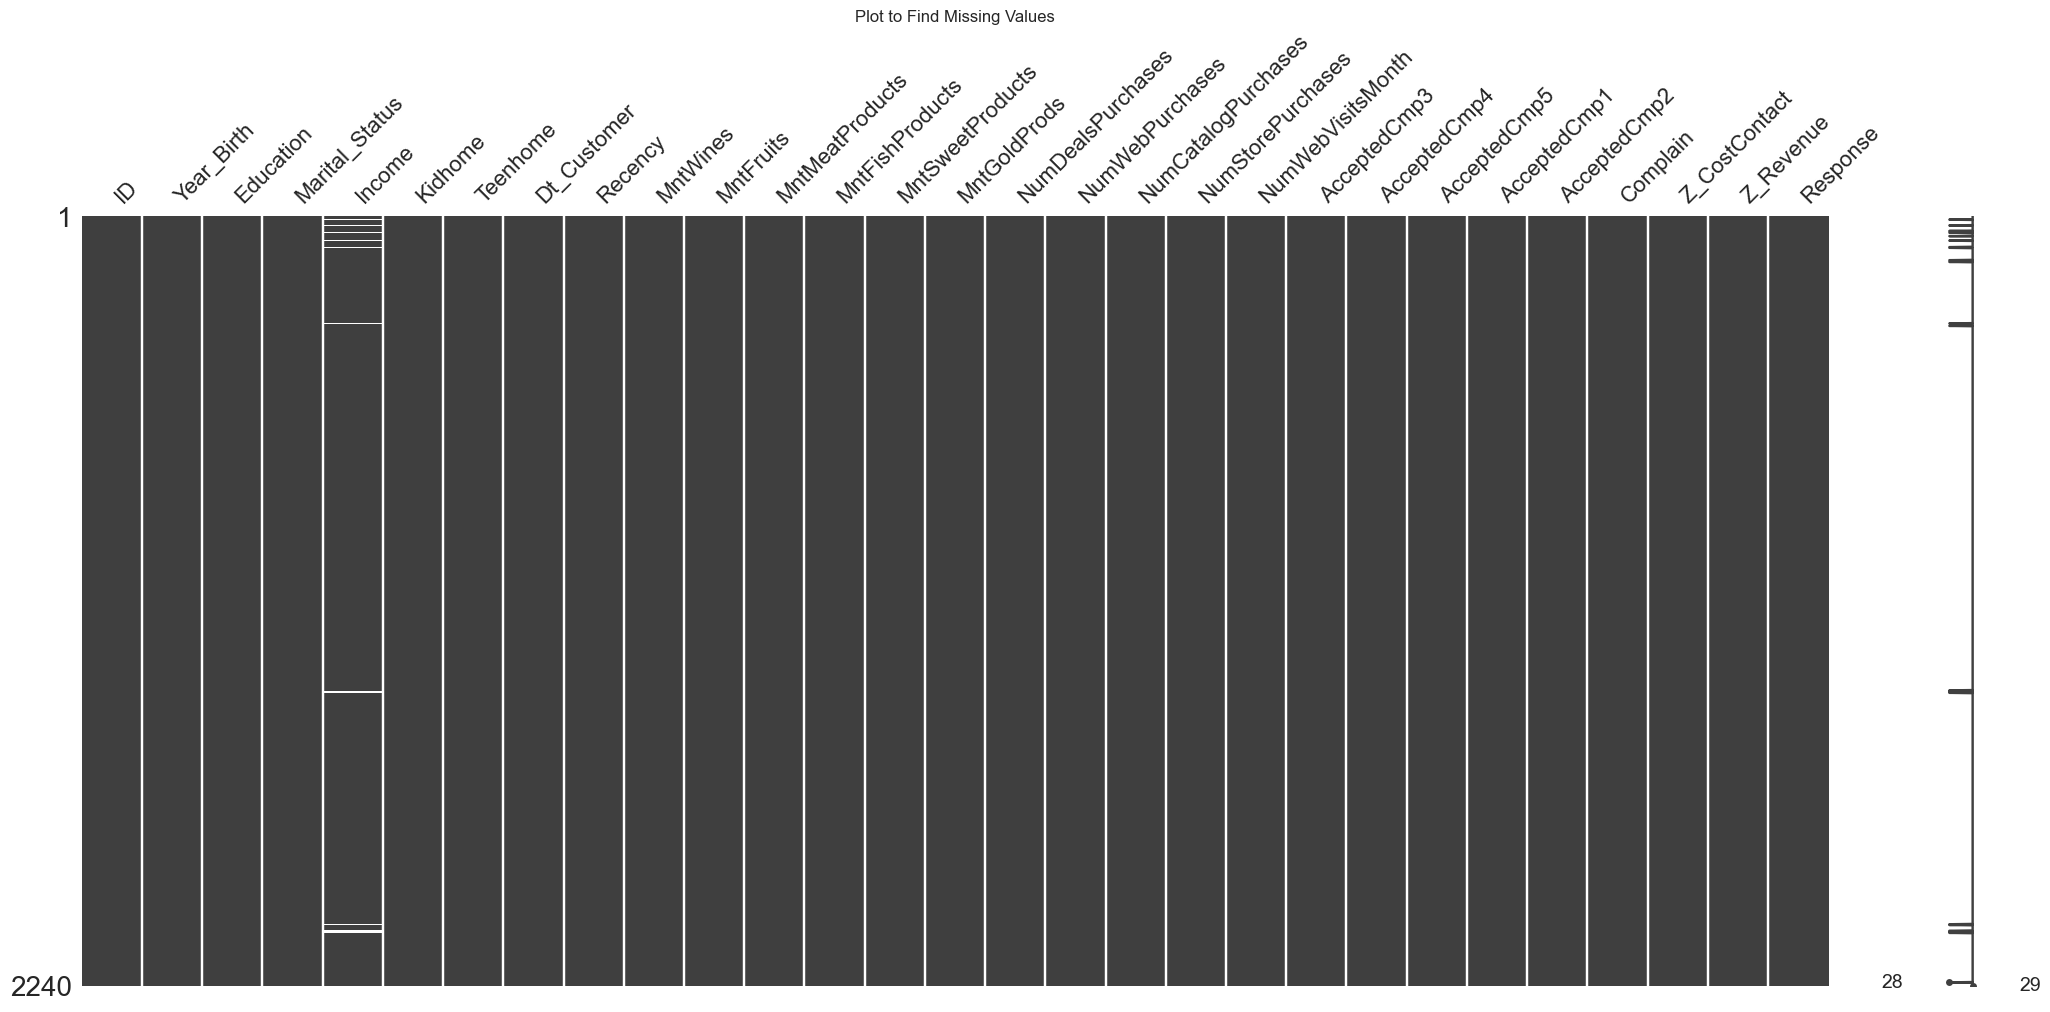

In [2567]:
missingno.matrix(marketingCampData)
plt.title('Plot to Find Missing Values')

 #### Finding null values in dataset

In [2568]:
# Finding null values in dataset
marketingCampData.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [2569]:
medData=marketingCampData['Income'].median()
marketingCampData=marketingCampData.fillna(medData)
print(marketingCampData.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


#### Tranforming the attribute Year_Birth into Age by subtracting 2014 from their birth year because the datais of 2 years from 2012-2014

In [2570]:

marketingCampData['Marital_Status']=marketingCampData["Marital_Status"].replace({"Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", 'Alone':'Single'})



totalAmountSpent=marketingCampData['MntWines']+marketingCampData['MntFruits']+marketingCampData['MntMeatProducts']+marketingCampData['MntFishProducts']+marketingCampData['MntSweetProducts']+marketingCampData['MntGoldProds']
marketingCampData['totalAmountSpent']=totalAmountSpent


marketingCampData['Year_Birth'].dtype

age=2014-marketingCampData['Year_Birth']
marketingCampData['Age']=age
print(marketingCampData['Age'])

print(marketingCampData.columns)
marketingCampData=marketingCampData.drop('Year_Birth', axis=1)



0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: Age, Length: 2240, dtype: int64
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'totalAmountSpent', 'Age'],
      dtype='object')


#### Plotting Age Outliers

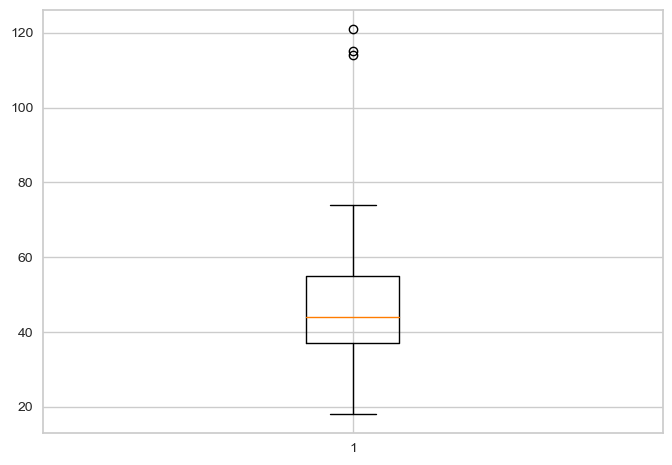

In [2571]:
plt.boxplot(marketingCampData['Age'])
plt.show()

#### Calculating Outliers in Age and discarding them

In [2572]:
outliersAge=[]

for row in marketingCampData['Age']:
    if row <= int(90):
        outliersAge.append(int(row))

dfOutliersAge=pd.DataFrame(outliersAge)
df2=dfOutliersAge.dropna()
print(df2.isnull().sum())
print(len(df2))
marketingCampData['Age']=df2
marketingCampData['Age'].isnull().sum()
marketingCampData['Age']=marketingCampData['Age'].dropna()
marketingCampData= marketingCampData.dropna()


0    0
dtype: int64
2237


#### Plotting Income Outliers

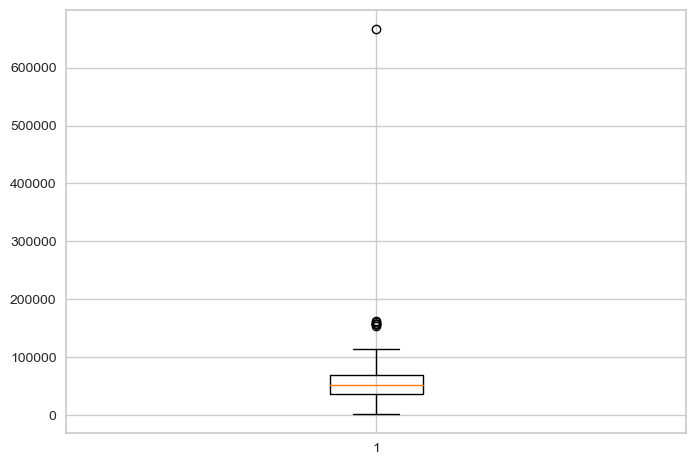

In [2573]:
plt.boxplot(marketingCampData['Income'])
plt.show()

#### Calculating Outliers in Income and discarding them

In [2574]:
outliersIncome=[]
# Q1Income= marketingCampData['Income'].quantile(0.25)

# Q3Income= marketingCampData['Income'].quantile(0.75)
# IQRIncome= Q3Income-Q1Income
# upperLimitIncome=Q3Income+1.5*IQRIncome
# lowerLimitIncome=Q1Income-1.5*IQRIncome

for row in marketingCampData['Income']:
    if row <= 600000:
        outliersIncome.append(int(row))

dfOutliersIncome=pd.DataFrame(outliersIncome)

dfOutliersIncome=dfOutliersIncome.dropna()
marketingCampData['Income']=dfOutliersIncome
marketingCampData['Income'].isnull().sum()
marketingCampData['Income']=marketingCampData['Income'].dropna()
marketingCampData= marketingCampData.dropna()

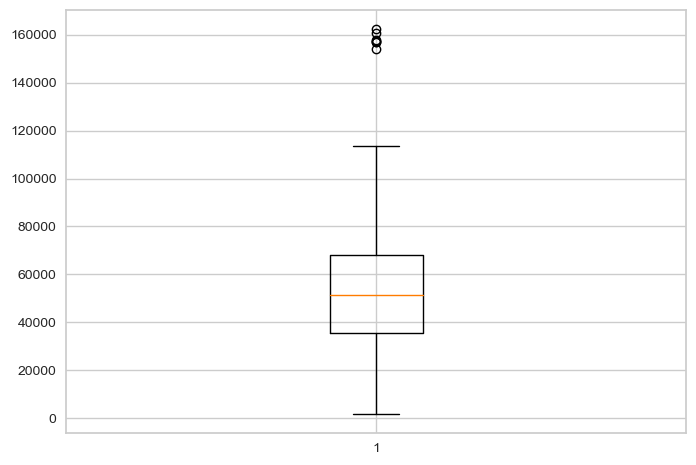

In [2575]:
plt.boxplot(marketingCampData['Income'])
plt.show()

#### Extracting new feature IsParent from Kidhome and Teenhome in order to know if a customer is parent or not

In [2576]:
parentFlagList=[]

for rowKid,rowTeen in zip(marketingCampData['Kidhome'],marketingCampData['Teenhome']):
    if rowKid|rowTeen>0:
        parentFlagList.append(1)
    else:
        parentFlagList.append(0)

dfParentFlag= pd.DataFrame(parentFlagList)
marketingCampData['IsParent']= dfParentFlag
attribute.insert(5,'IsParent')

for x in attribute:
    if x=='Kidhome'or x=='Teenhome':
        attribute.remove(x)
attribute.insert(6,'Kidhome')
attribute.insert(7,'Teenhome')




#### Extracting new feature CustomerRegistrationDays, it means the day on which the customer registered in the database

In [2577]:
marketingCampData["Dt_Customer"] = pd.to_datetime(marketingCampData["Dt_Customer"])
dateList = []
for row in marketingCampData["Dt_Customer"]:
    row = row.date()
    dateList.append(row)  

dayList = []
maxDate= max(dateList) 
for row in dateList:
    result= maxDate - row
    dayList.append(result)
marketingCampData["CustomerRegistrationDays"] = days
marketingCampData['CustomerRegistrationDays'] = marketingCampData['CustomerRegistrationDays'].dt.days.astype('int16')
marketingCampData

/var/folders/f8/gtjrzptn44l9ln2s4pgm_7xc0000gn/T/ipykernel_8775/1554733878.py:1: UserWarning: Parsing '21/08/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  marketingCampData["Dt_Customer"] = pd.to_datetime(marketingCampData["Dt_Customer"])
/var/folders/f8/gtjrzptn44l9ln2s4pgm_7xc0000gn/T/ipykernel_8775/1554733878.py:1: UserWarning: Parsing '19/01/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  marketingCampData["Dt_Customer"] = pd.to_datetime(marketingCampData["Dt_Customer"])
/var/folders/f8/gtjrzptn44l9ln2s4pgm_7xc0000gn/T/ipykernel_8775/1554733878.py:1: UserWarning: Parsing '13/11/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  marketingCampData["Dt_Customer"] = pd.to_datetime(marketingCampData["Dt_Customer"])
/var/folders/f8/gtjrzptn44l9ln2s4pgm_7xc0000gn/T/ipykernel_8775/1554733878.py:1: UserWarning: Parsin

ID   Education Marital_Status   Income  Kidhome  Teenhome  \
0      5524  Graduation         Single  58138.0        0         0   
1      2174  Graduation         Single  46344.0        1         1   
2      4141  Graduation       Together  71613.0        0         0   
3      6182  Graduation       Together  26646.0        1         0   
4      5324         PhD        Married  58293.0        1         0   
...     ...         ...            ...      ...      ...       ...   
2231   9817      Master         Single  44802.0        0         0   
2232   8080  Graduation         Single  26816.0        0         0   
2233   9432  Graduation       Together  34421.0        1         0   
2234   8372  Graduation        Married  61223.0        1         0   
2235  10870  Graduation        Married  64014.0        0         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp1  \
0     2012-04-09       58       635         88  ...             0   
1     2014-08-03       38        11          1  ...             0   
2     2013-08-21       26       426         49  ...             0   
3     2014-10-02       26        11          4  ...             0   
4     2014-01-19       94       173         43  ...             0   
...          ...      ...       ...        ...  ...           ...   
2231  2012-08-21       71       853         10  ...             0   
2232  2012-08-17       50         5          1  ...             0   
2233  2013-02-06       23         9         14  ...             0   
2234  2013-01-07       81         3          3  ...             0   
2235  2013-06-13       46       709         43  ...             0   

      AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0                0         0              3         11         1   
1                0         0              3         11         0   
2                0         0              3         11         0   
3                0         0              3         11         0   
4                0         0              3         11         0   
...            ...       ...            ...        ...       ...   
2231             0         0              3         11         0   
2232             0         0              3         11         0   
2233             0         0              3         11         0   
2234             0         0              3         11         0   
2235             0         0              3         11         0   

      totalAmountSpent   Age  IsParent  CustomerRegistrationDays  
0                 1617  57.0         0                       971  
1                   27  60.0         1                       125  
2                  776  49.0         0                       472  
3                   53  30.0         1                        65  
4                  422  33.0         1                       321  
...                ...   ...       ...                       ...  
2231              1049  40.0         0                       837  
2232                22  47.0         0                       841  
2233                62  68.0         1                       668  
2234                30  33.0         1                       698  
2235              1341  58.0         1                       541  

[2236 rows x 32 columns]

#### Discarding the redundanct and unimportant features have no correlation

In [2578]:
marketingCampData= marketingCampData.drop(['Z_CostContact','Z_Revenue'], axis=1)

print(marketingCampData.isnull().sum())

ID                          0
Education                   0
Marital_Status              0
Income                      0
Kidhome                     0
Teenhome                    0
Dt_Customer                 0
Recency                     0
MntWines                    0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Response                    0
totalAmountSpent            0
Age                         0
IsParent                    0
CustomerRegistrationDays    0
dtype: int64


#### Plotting correlation matrix using heatmap to find the correlation between feature to select the features for model building

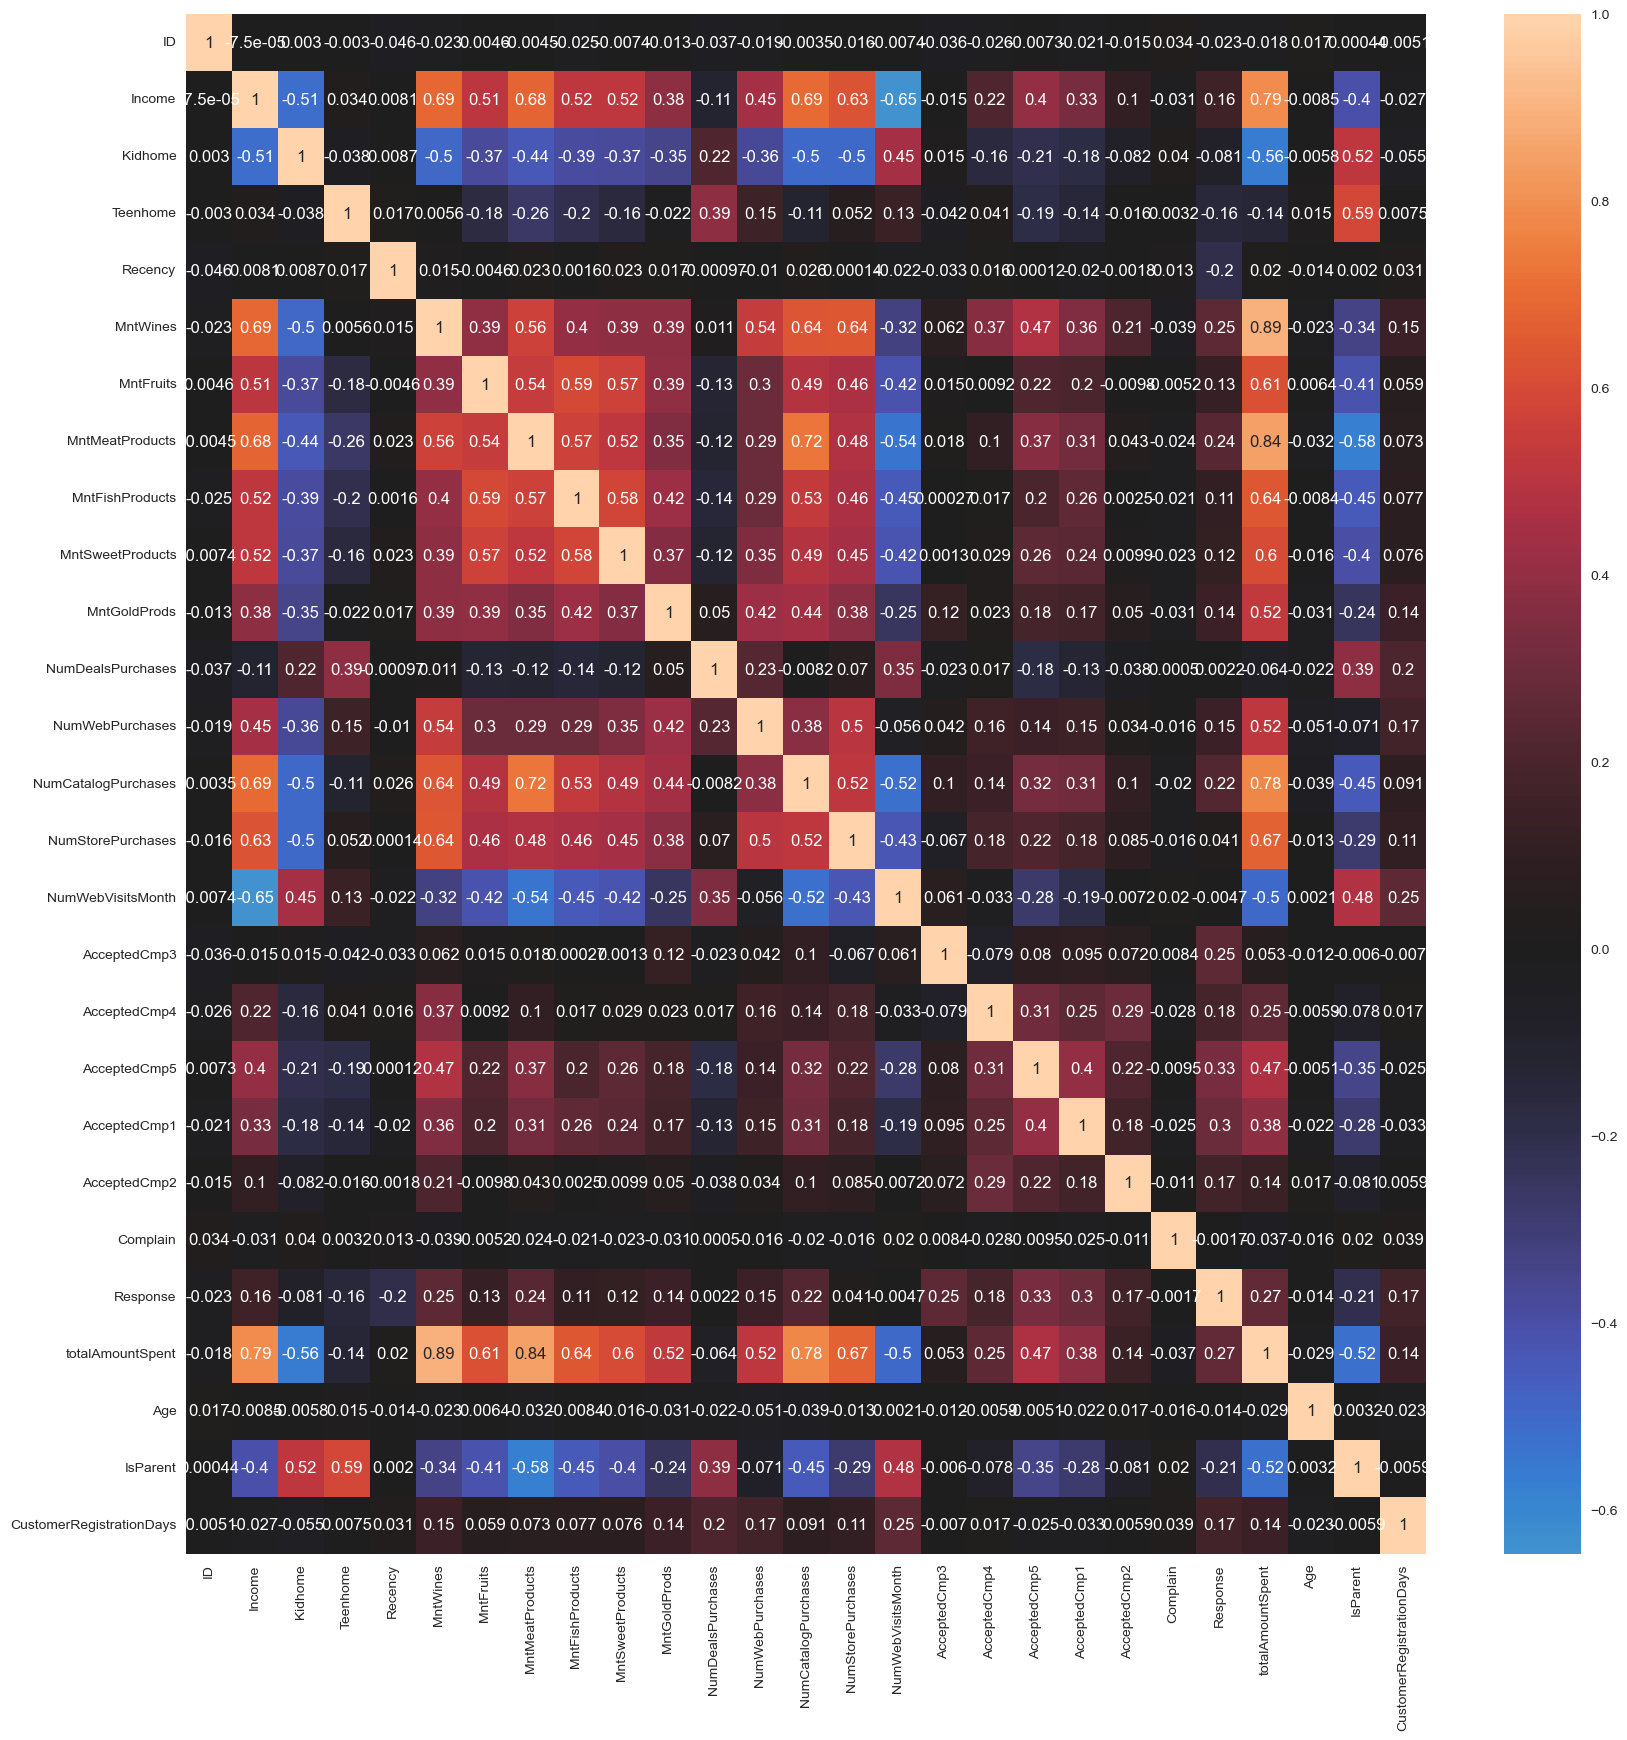

In [2579]:
corrMarketting=marketingCampData.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrMarketting,annot=True, center=0)
plt.show() 

#### Pairplotting the important features in the dataset but it seems only totalAmountSpent and Income are showing correlation

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

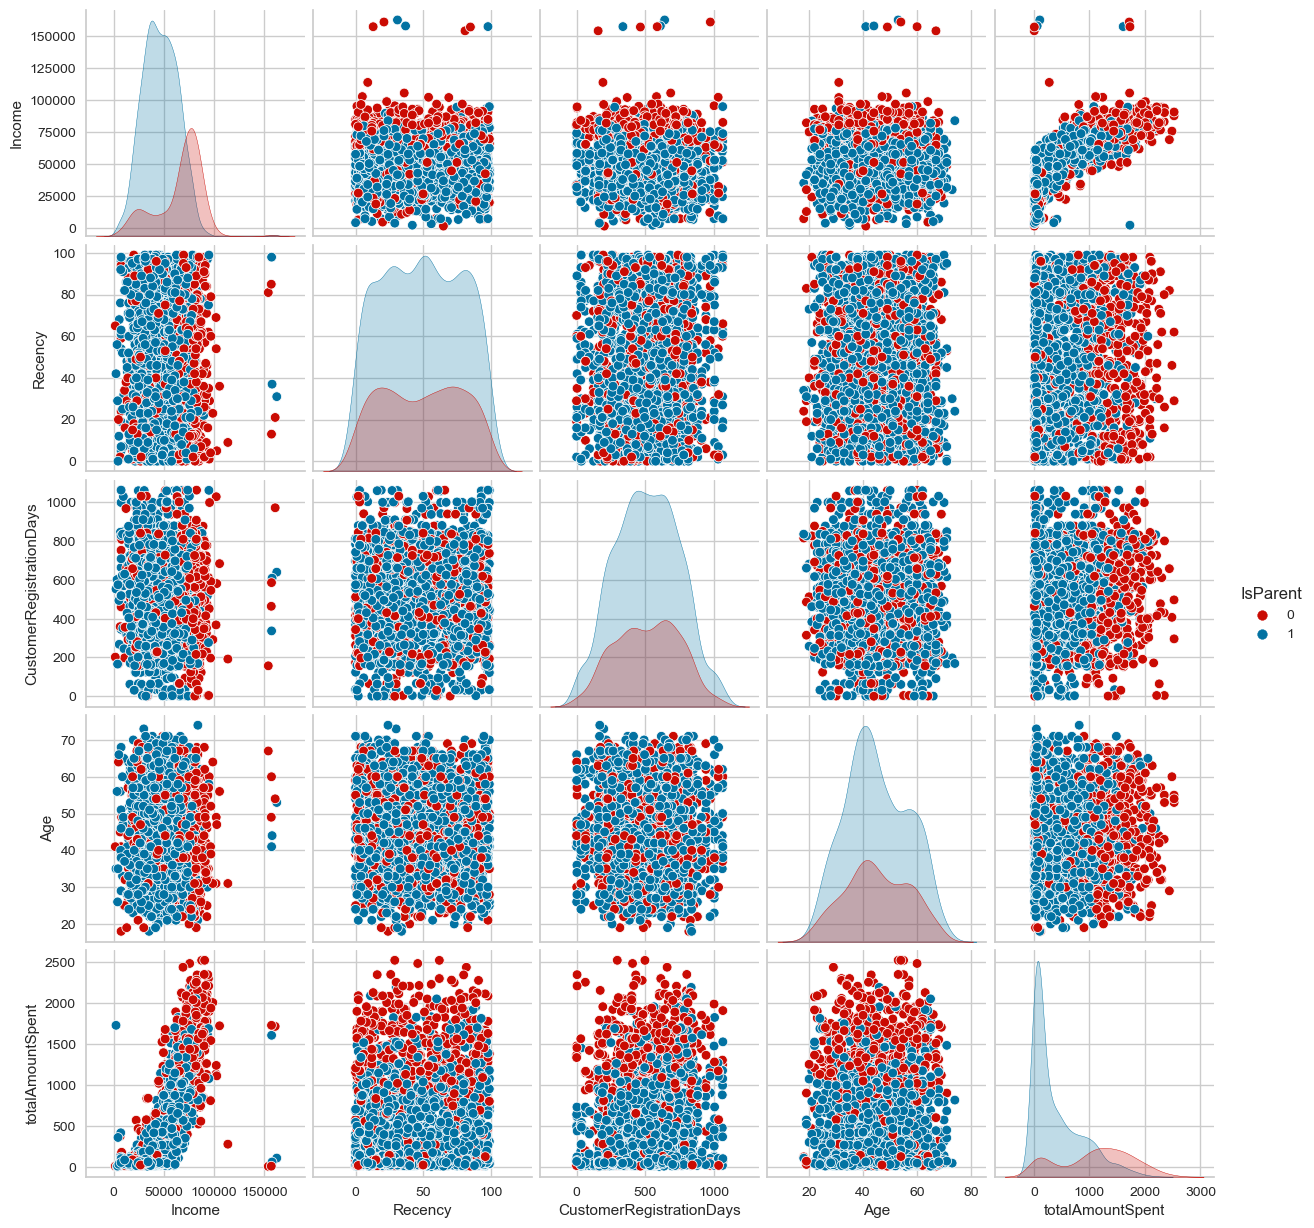

In [2580]:
To_Plot = [ "Income", "Recency", "CustomerRegistrationDays", "Age", "totalAmountSpent", "IsParent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(marketingCampData[To_Plot], hue= "IsParent", palette=['r','b'])
plt.show()

#### Recency Feature is transformed into 3 new features(LoyalCustomers, aboutToChurn and churned) based on their days of recent purchases

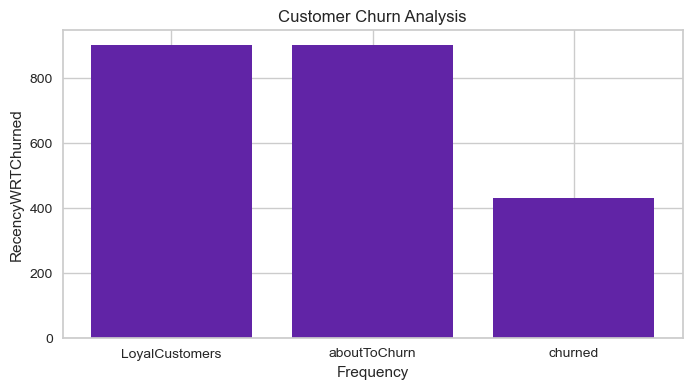

Number of Samples of Recency w.r.t Churned 
LoyalCustomers    902
aboutToChurn      901
churned           433
Name: RecencyWRTChurned, dtype: int64


In [2581]:
recencyList=[]
for per in marketingCampData['Recency']:
    if per >=0 or per<30:
        recencyList.append('LoyalCustomers')
    if per>30 or per<50:
        recencyList.append('aboutToChurn')
    if per>50:
        recencyList.append('churned')

dfRecency= pd.DataFrame(recencyList)
marketingCampData['RecencyWRTChurned']=dfRecency
# To get the categories in a column
marketingCampData.RecencyWRTChurned.unique()
# To get the value count of each category in a column 
marketingCampData.RecencyWRTChurned.value_counts()

plt.figure(figsize=(8,4))

plt.bar(marketingCampData["RecencyWRTChurned"].value_counts().index, marketingCampData["RecencyWRTChurned"].value_counts(), color = '#6124a6')
plt.xlabel("Frequency")
plt.ylabel("RecencyWRTChurned")
plt.title("Customer Churn Analysis")
plt.show()
print(f"Number of Samples of Recency w.r.t Churned \n{marketingCampData['RecencyWRTChurned'].value_counts()}")

#### Age feature is transformed into 3 groups of ages such as Young, Adult and Elderly for better insights

In [2582]:
ageGroup=[]

for age in marketingCampData['Age']:
    if age<25:
        ageGroup.append('Young')
    if age>=25 or age <60:
        ageGroup.append('Adult')
    if age>=60:
        ageGroup.append('Elderly')

dfAgeGroup= pd.DataFrame(ageGroup)
print(min(marketingCampData['Age']))
marketingCampData['AgeGroup']= dfAgeGroup
marketingCampData['AgeGroup'].unique()
print(marketingCampData['AgeGroup'].value_counts())

18.0
Adult      1922
Elderly     263
Young        51
Name: AgeGroup, dtype: int64


#### Plotting Income and totalAmountSpent and grouping it by Age group to infer insights

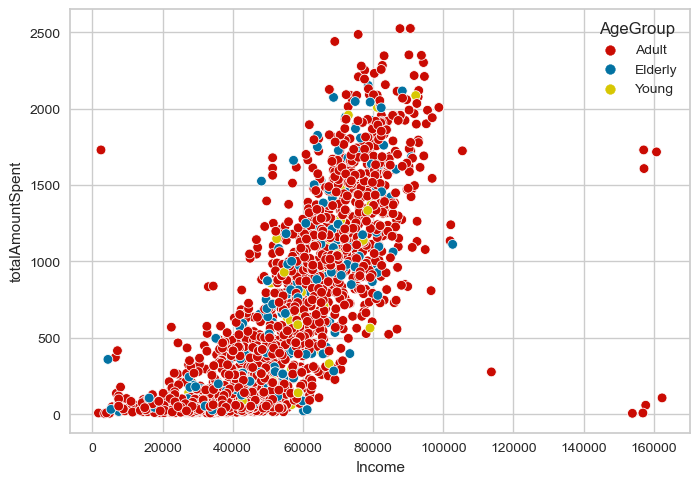

In [2583]:
To_Plot = [ "Income", "totalAmountSpent", "AgeGroup"]
plt.figure()
sns.scatterplot(x=marketingCampData['Income'],y=marketingCampData['totalAmountSpent'],hue=marketingCampData['AgeGroup'], palette=['r','b','y'])
plt.show()

#### Plotting maximum spent according to age groups

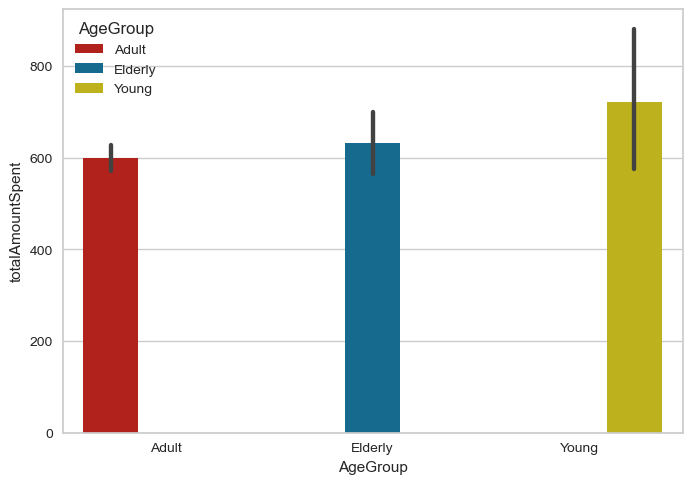

In [2374]:
To_Plot = [ "Income", "totalAmountSpent", "AgeGroup"]
plt.figure()
sns.barplot(x=marketingCampData['AgeGroup'],y=marketingCampData['totalAmountSpent'],hue=marketingCampData['AgeGroup'], palette=['r','b','y'])
plt.show()

#### Plotting the total count of different modes of purchases done by customers

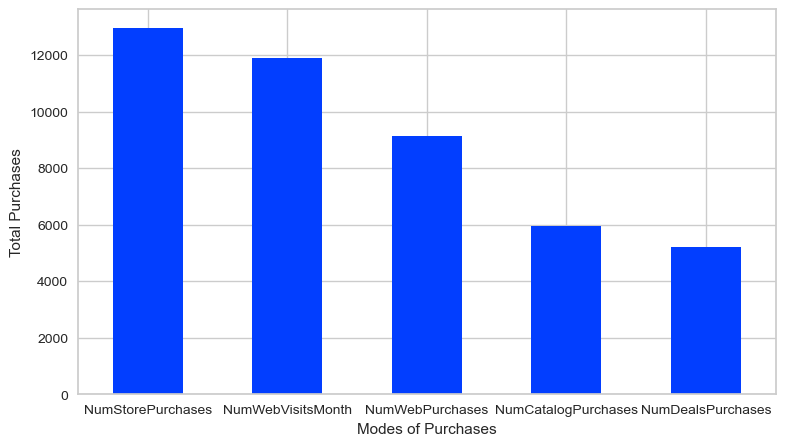

In [2553]:
dfNew= marketingCampData[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','NumDealsPurchases']]
dfSum=dfNew[['NumWebPurchases','NumCatalogPurchases']].sum()
dfNew.sum().sort_values(ascending=False).plot.bar(rot='horizontal', figsize=(9, 5))
plt.xlabel('Modes of Purchases')
plt.ylabel('Total Purchases')
plt.show()

#### Plotting the total amount spent on purchasing products by customers

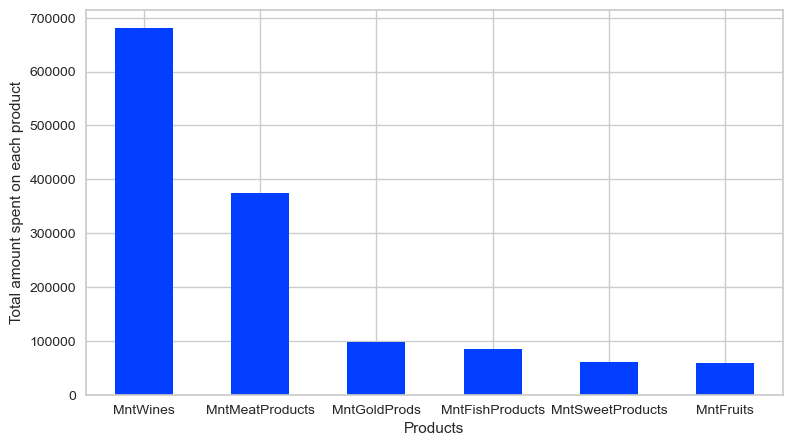

In [2554]:
dfNew= marketingCampData[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]]

dfNew.sum().sort_values(ascending=False).plot.bar(rot='horizontal', figsize=(9, 5))
plt.xlabel('Products')
plt.ylabel('Total amount spent on each product')
plt.show()

#### Plotting All the products on the basis of consumed by parents and not parents

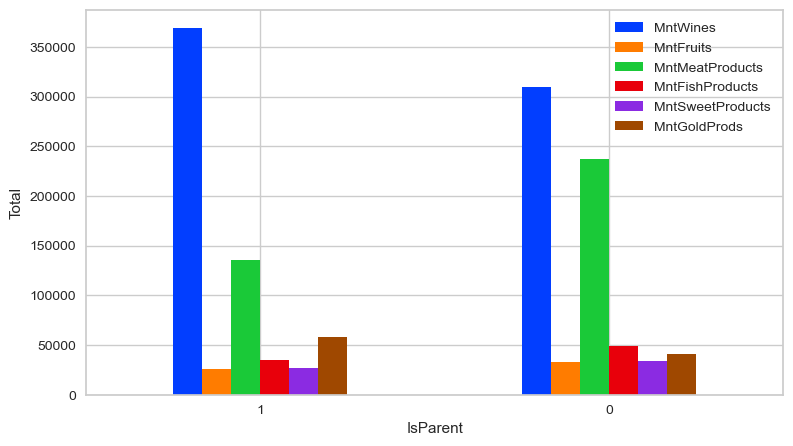

In [2380]:
dfGrocItems=marketingCampData.groupby('IsParent')[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum().reset_index().sort_values(by=["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"],ascending=False)
dfGrocItems.plot(x='IsParent',ylabel='Total', kind="bar", figsize=(9, 5), legend=True,rot='horizontal')
plt.show()

#### Second cycle  in Portugal is equivalent to masters degree thus replacing with Master

In [2385]:
marketingCampData['Education']=marketingCampData["Education"].replace({'2n Cycle':"Master"})

Value Counts of Categories= Graduation    1126
Master         572
PhD            484
Basic           54
Name: Education, dtype: int64
Data Type= object
Graduation    1126
Master         572
PhD            484
Basic           54
dtype: int64


## Data Preprocessing

#### Applying one hot encoding on Education for categorical feature to convert it into numerical 

In [2386]:
educationCol = pd.get_dummies(marketingCampData['Education'], drop_first=False)
print(educationCol)
marketingCampData= marketingCampData.join(educationCol)

marketingCampData= marketingCampData.drop('Education', axis=1)
attribute.remove('Education')

      Basic  Graduation  Master  PhD
0         0           1       0    0
1         0           1       0    0
2         0           1       0    0
3         0           1       0    0
4         0           0       0    1
...     ...         ...     ...  ...
2231      0           0       1    0
2232      0           1       0    0
2233      0           1       0    0
2234      0           1       0    0
2235      0           1       0    0

[2236 rows x 4 columns]


#### Applying one hot encoding on Education, Marital_Status, RecencyWRTChurned for categorical feature to convert it into numerical 

#### After then dropping these columns from the dataset 

In [2394]:
statusCol = pd.get_dummies(marketingCampData['Marital_Status'], drop_first=False)
marketingCampData= marketingCampData.join(statusCol)
marketingCampData= marketingCampData.drop('Marital_Status', axis=1)
attribute.remove('Marital_Status')

ageGroupCol= pd.get_dummies(marketingCampData['AgeGroup'], drop_first=False)
marketingCampData= marketingCampData.join(ageGroupCol)
marketingCampData= marketingCampData.drop('AgeGroup',axis=1)
marketingCampData= marketingCampData.drop('Age',axis=1)

churnedCol= pd.get_dummies(marketingCampData['RecencyWRTChurned'], drop_first=False)
marketingCampData= marketingCampData.join(churnedCol)
marketingCampData= marketingCampData.drop('RecencyWRTChurned',axis=1)
marketingCampData= marketingCampData.drop('Recency', axis=1)

print(marketingCampData.isnull().sum())

ID                          0
Income                      0
Kidhome                     0
Teenhome                    0
Dt_Customer                 0
MntWines                    0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Response                    0
totalAmountSpent            0
IsParent                    0
CustomerRegistrationDays    0
Basic                       0
Graduation                  0
Master                      0
PhD                         0
Alone                       0
Divorced                    0
Married                     0
Single    

#### Dropping Dt_customer as we have created new column i.e. CustomerRegistrationDays

In [2398]:
marketingCampData= marketingCampData.drop(columns='Dt_Customer',axis=1)

#### Dropping these following columns due to the fact that these feature have shown no correlation for the feature to be selected.

In [2399]:
marketingCampData2= marketingCampData.copy()
marketingCampData2= marketingCampData2.drop(columns=['ID','AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response'], axis=1)




## Model Building

### Dimensionality Reduction: Principal Component Analysis(PCA)

#### We employed PCA a dimensionality reduction technique that reduces the number of features that are less important and retains the essential features while retaining the data integrity. PCA is sensitive to variance of features and the features having high values will be regarded as of higher importance by the PCA due to which these features will dominate the analysis, furthermore, it will be biased towards those features. To cater this issue scaling was applied. 

#### Scaling is applied on the data in order to standardize the features to have common scale. In our data many of the features were correlated as well as some were redundant so there was a need to apply PCA so that minimum information loss is observed while increasing interpretability

In [2400]:
scaler = StandardScaler()
scaler.fit(marketingCampData2)
scaled_ds = pd.DataFrame(scaler.transform(marketingCampData2),columns= marketingCampData2.columns)
print(scaled_ds)

        Income   Kidhome  Teenhome  MntWines  MntFruits  MntMeatProducts  \
0     0.288783 -0.825455 -0.928955  0.984566   1.550295         1.678169   
1    -0.261905  1.035147  0.907600 -0.869645  -0.636159        -0.712985   
2     0.917961 -0.825455 -0.928955  0.363524   0.570161        -0.177190   
3    -1.181648  1.035147 -0.928955 -0.869645  -0.560764        -0.650993   
4     0.296021  1.035147 -0.928955 -0.388263   0.419371        -0.217042   
...        ...       ...       ...       ...        ...              ...   
2231 -0.333904 -0.825455 -0.928955  1.632351  -0.409974        -0.106341   
2232 -1.173710 -0.825455 -0.928955 -0.887474  -0.636159        -0.712985   
2233 -0.818616  1.035147 -0.928955 -0.875588  -0.309448        -0.659849   
2234  0.432829  1.035147 -0.928955 -0.893417  -0.585896        -0.708557   
2235  0.563147 -0.825455  0.907600  1.204456   0.419371         0.066354   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  ...  \
0     

#### PCA is Applied and the number of components are reduced in 3 dimensions

#### Code Reference= https://machinelearningmastery.com/principal-component-analysis-for-visualization/. I used the code of 3D projection from this above link

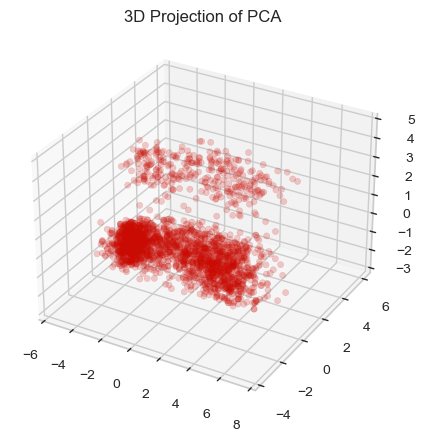

In [2451]:
pca = PCA(n_components=3)
pcaDset= pca.fit(scaled_ds)
pcaTransformed=pca.transform(scaled_ds)
pcaDsetTranformed = pd.DataFrame(pcaTransformed)
figPCA=plt.figure(figsize=(9,5))
ax = figPCA.add_subplot(projection='3d')
ax.scatter(pcaTransformed[:,0], pcaTransformed[:,1], pcaTransformed[:,2],color='r',alpha=0.2)
ax.set_title('3D Projection of PCA')
plt.show()



## Elbow Method 

#### To find the optimal clusters we used elbow method.

In [2416]:
kRange= range(1,10)
SSE = []
for k in kRange:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pcaDsetTranformed)
    SSE.append(kmeans.inertia_)
print('SSE= {0}'.format(SSE))

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.

SSE= [28715.719443652517, 15205.812213520307, 10195.141422571834, 7202.27207675222, 6169.770962080418, 5505.79870767388, 4877.959210768669, 4267.947568294803, 3807.407293538256]


/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


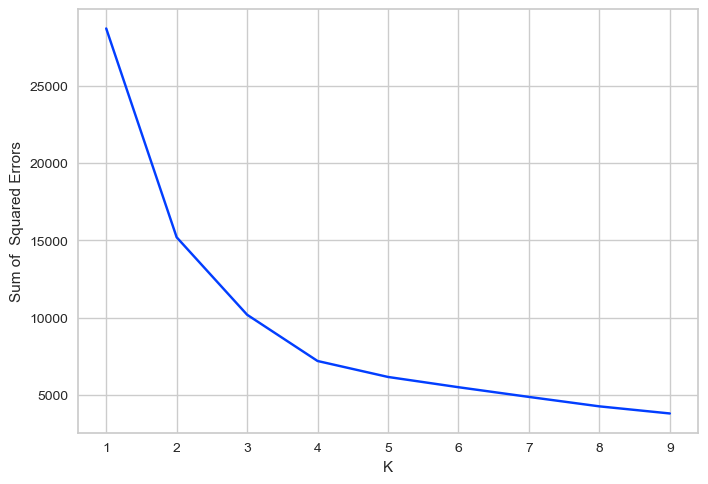

In [2417]:
plt.xlabel('K')
plt.ylabel('Sum of  Squared Errors')
plt.plot(kRange, SSE)

#### We also used the library KElbowVisualizer to automatically find the optimal clusters

#### Code Reference= https://https://www.scikit-yb.org/en/latest/api/cluster/elbow.html. 

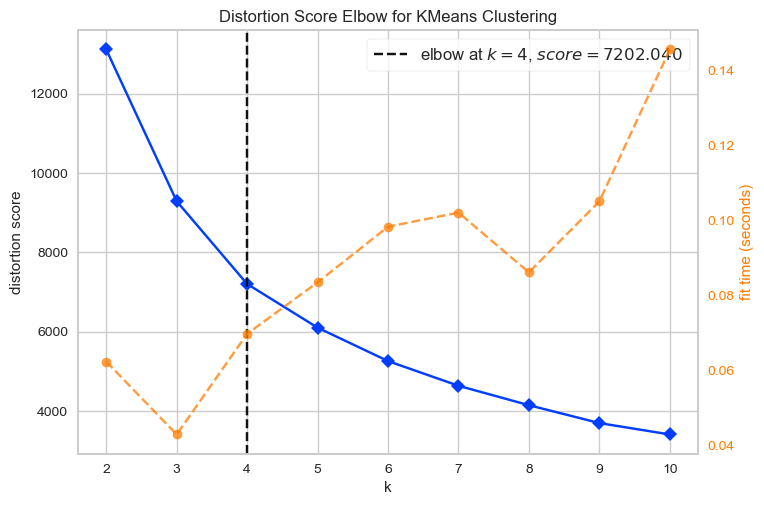

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [2461]:
from yellowbrick.cluster import KElbowVisualizer

Elbow_M= KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pcaDsetTranformed)
Elbow_M.show()



## K-Means Clustering

#### Now that we have found the optimal clusters we applying Kmeans and fit and predict the scaled data set 

#### Code Referece= https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [2419]:
kmean=KMeans(n_clusters=4)
print(kmean)
predicted= kmean.fit_predict(pcaDsetTranformed)
print(predicted)


KMeans(n_clusters=4)
[0 1 3 ... 1 3 2]


/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0       0
1       1
2       3
3       1
4       2
       ..
2231    2
2232    1
2233    1
2234    3
2235    2
Name: Clusters, Length: 2236, dtype: int32
             0         1         2  Clusters
0     4.450228 -0.536545 -0.054841         0
1    -2.657585 -1.049180  0.458251         1
2     2.306448  0.549803  4.064686         3
3    -2.684836 -1.365874  0.367106         1
4    -0.474508  0.365497 -1.161009         2
...        ...       ...       ...       ...
2231  1.495380  0.231739 -0.991648         2
2232 -1.709458 -2.584839  0.532780         1
2233 -2.396621 -0.194651  0.553045         1
2234 -2.402314  0.315977  3.757866         3
2235  2.730793  1.495792 -0.843496         2

[2236 rows x 4 columns]


Text(0.5, 0.92, '3D Projection of Clusters')

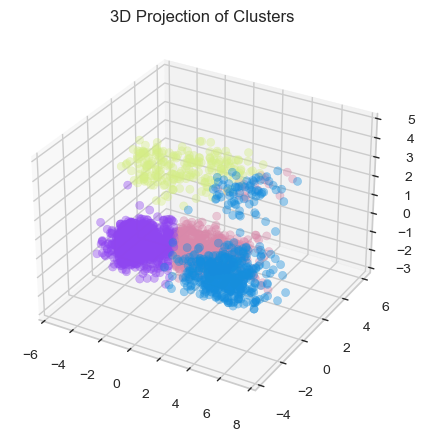

In [2487]:
pcaDsetTranformed['Clusters']=predicted
marketingCampData['Clusters']=predicted

print(marketingCampData['Clusters'])

x =pcaDsetTranformed[0]
y =pcaDsetTranformed[1]
z =pcaDsetTranformed[2]
print(pcaDsetTranformed)
figKmeans=plt.figure(figsize=(9,5))
axKmeans = figKmeans.add_subplot(projection='3d')
colorsClusters = colors.LinearSegmentedColormap.from_list("", ['#168ede','#8f46f0','#d989aa','#d5ed87'])
axKmeans.scatter(x,y,z,c=pcaDsetTranformed['Clusters'] , alpha=0.4,s=35, cmap=colorsClusters)
axKmeans.set_title('3D Projection of Clusters')

#### Find the total number of customers grouped in clusters

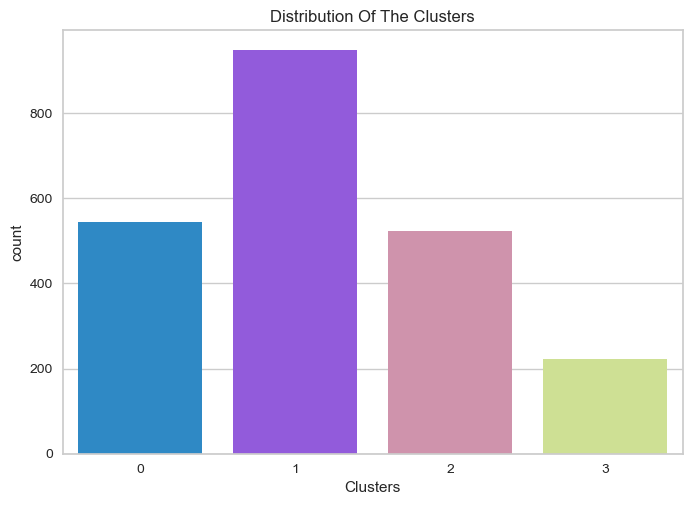

In [2502]:

pl = sns.countplot(x=marketingCampData["Clusters"], palette= ['#168ede','#8f46f0','#d989aa','#d5ed87'])
pl.set_title("Distribution Of The Clusters")
plt.show()


#### Plotting Income and Total amount spent wrt cluster to find which cluster have highly or least spent and its relation with the income

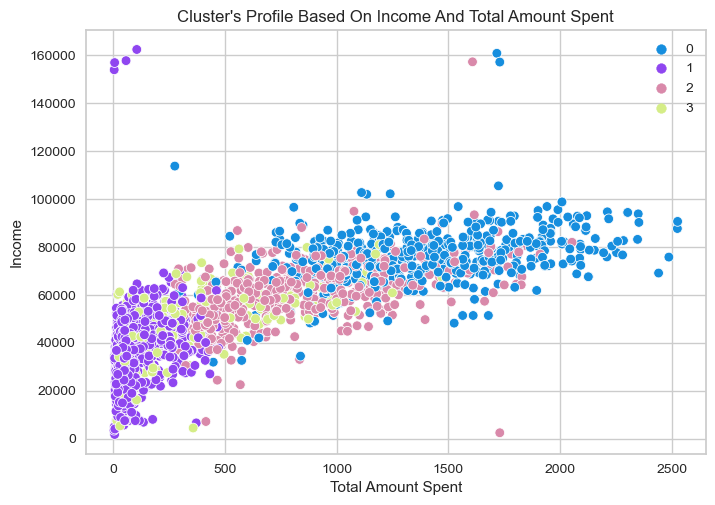

In [2494]:
plotAmntSpent = sns.scatterplot(data = marketingCampData,x=marketingCampData["totalAmountSpent"], y=marketingCampData["Income"],hue=marketingCampData["Clusters"], palette= colorsClusters)
plotAmntSpent.set_title("Cluster's Profile Based On Income And Total Amount Spent")
plotAmntSpent.set_xlabel("Total Amount Spent")
plt.legend()
plt.show()

#### Plotting Total Promotional Campaigns Accepted by the Clusters

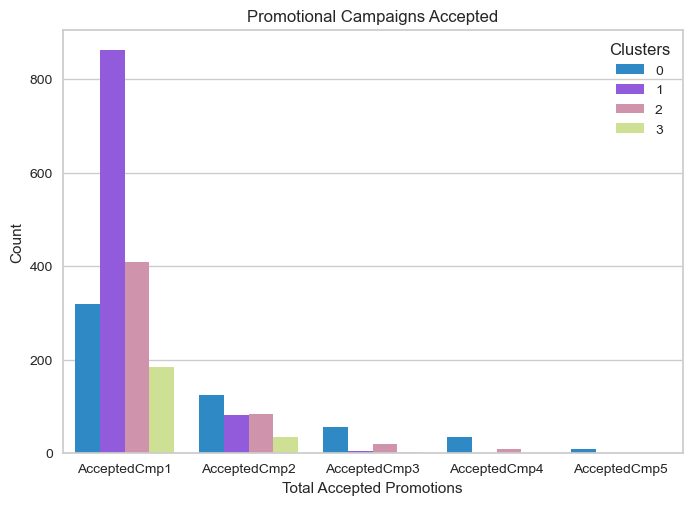

In [2507]:
marketingCampData["TotalCampaigns"] = marketingCampData["AcceptedCmp1"]+ marketingCampData["AcceptedCmp2"]+ marketingCampData["AcceptedCmp3"]+ marketingCampData["AcceptedCmp4"]+ marketingCampData["AcceptedCmp5"]

marketingCampData['TotalCampaigns']= marketingCampData['TotalCampaigns'].replace({0:'AcceptedCmp1',1:"AcceptedCmp2",2:'AcceptedCmp3',3:'AcceptedCmp4',4:'AcceptedCmp5'})
plt.figure()
pltPromo = sns.countplot(x=marketingCampData["TotalCampaigns"],hue=marketingCampData["Clusters"], palette= ['#168ede','#8f46f0','#d989aa','#d5ed87'])
pltPromo.set_title("Promotional Campaigns Accepted")
pltPromo.set_xlabel("Total Accepted Promotions")
pltPromo.set_ylabel("Count")
plt.show()

#### Plotting to check the response for number of deals purchased by the Clusters 

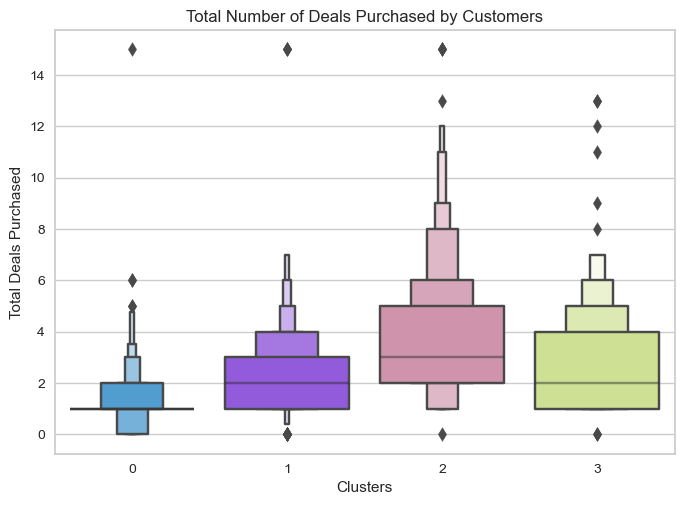

In [2425]:
plt.figure()
plotDealsPurchases=sns.boxenplot(x=marketingCampData["Clusters"],y=marketingCampData["NumDealsPurchases"].astype(int), palette= ['#168ede','#8f46f0','#d989aa','#d5ed87'])
plotDealsPurchases.set_title("Total Number of Deals Purchased by Customers")
plotDealsPurchases.set_ylabel('Total Deals Purchased')
plt.show()

#### Plotting to check the response of different modes of purchasing by Clusters 

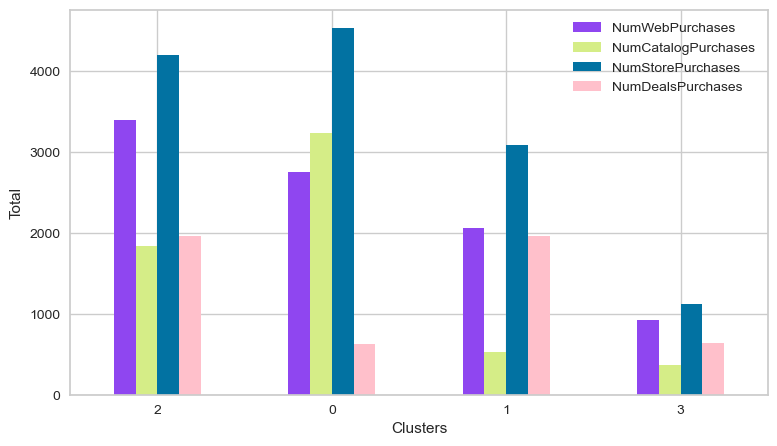

In [2426]:
dfGroc=marketingCampData.groupby('Clusters')[[ 'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases']].sum().reset_index().sort_values(by=[ 'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases'],ascending=False)
dfGroc.plot(x='Clusters',ylabel='Total', kind="bar", figsize=(9, 5), legend=True,rot='horizontal',color = ['#8f46f0','#d5ed87','b','pink'])
plt.show()



#### Plotting to depict what products are attractive, hot selling and require adequate supplies and what products needs deals and discounts

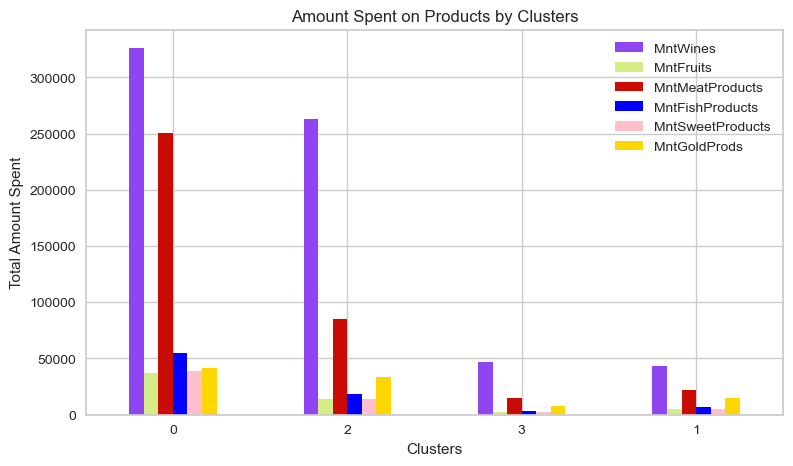

In [2509]:
dfGroc=marketingCampData.groupby('Clusters')[[ 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']].sum().reset_index().sort_values(by=['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds'],ascending=False)
dfGroc.plot(x='Clusters',ylabel='Total', kind="bar", figsize=(9, 5), legend=True,rot='horizontal',color = ['#8f46f0','#d5ed87','r','blue','pink','gold'])
plt.title('Amount Spent on Products by Clusters')
plt.ylabel("Total Amount Spent")
plt.show()

#### Plotting to check how many people have churned so that these customers can be targetted with personalized offers

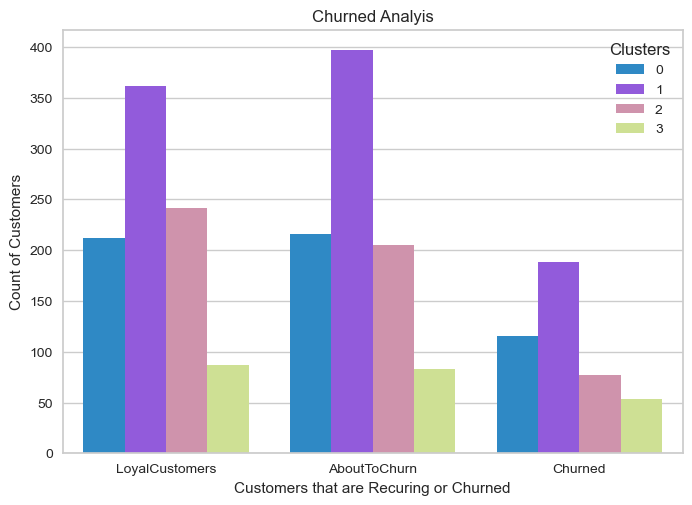

In [2500]:
churnedList=[]
for rowLoyal,rowAbout,rowChurned in zip(marketingCampData["LoyalCustomers"], marketingCampData["aboutToChurn"], marketingCampData["churned"]):
    if rowLoyal ==1:
        churnedList.append('LoyalCustomers')
    if rowAbout == 1:
        churnedList.append('AboutToChurn')
    if rowChurned == 1:
        churnedList.append('Churned')
dfChurned=pd.DataFrame(churnedList)
marketingCampData['Churned']= dfChurned

plt.figure()
plotChurned = sns.countplot(x=marketingCampData["Churned"],hue=marketingCampData["Clusters"], palette= ['#168ede','#8f46f0','#d989aa','#d5ed87'])
plotChurned.set_title("Churned Analyis")
plotChurned.set_xlabel("Customers that are Recuring or Churned")
plotChurned.set_ylabel("Count of Customers")


plt.show()






### Profiling of Clusters

#### Plotting density plot to figure out all the characteristics of clusters to infer what customers are present in which clusters

#### Code Reference= https://seaborn.pydata.org/generated/seaborn.kdeplot.html

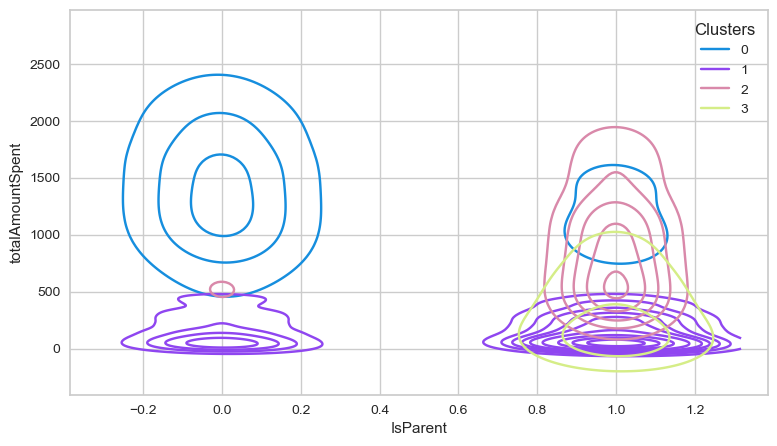

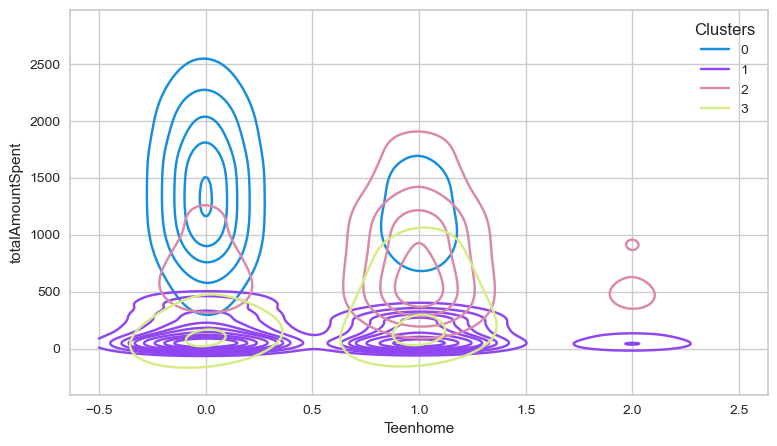

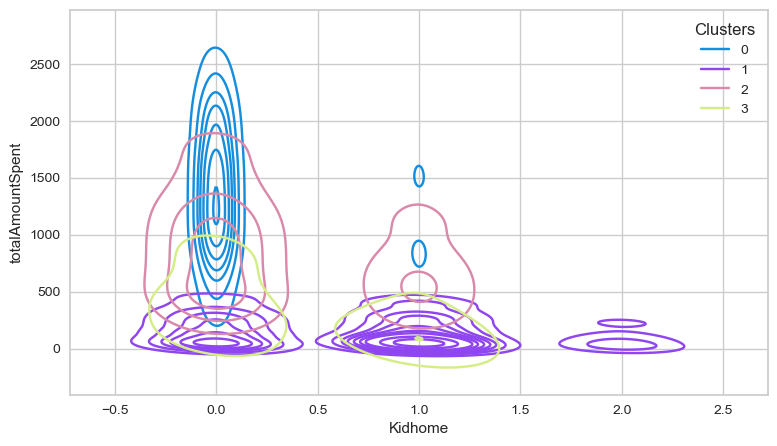

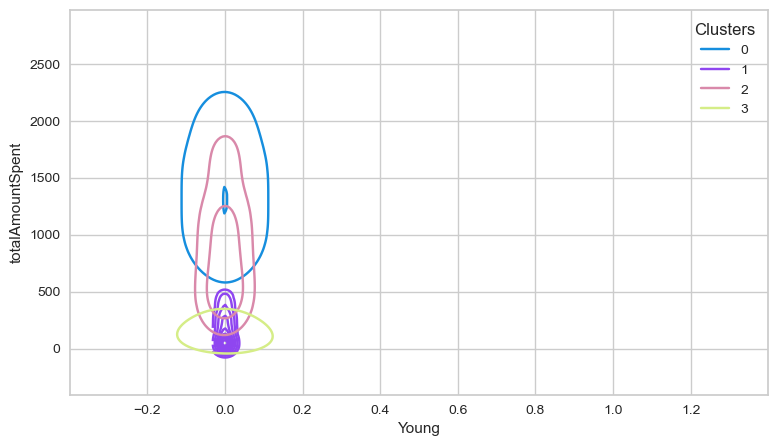

/var/folders/f8/gtjrzptn44l9ln2s4pgm_7xc0000gn/T/ipykernel_8775/1128030408.py:5: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=marketingCampData[attrColumns],y=marketingCampData['totalAmountSpent'],hue=marketingCampData["Clusters"],palette=colorsClusters)


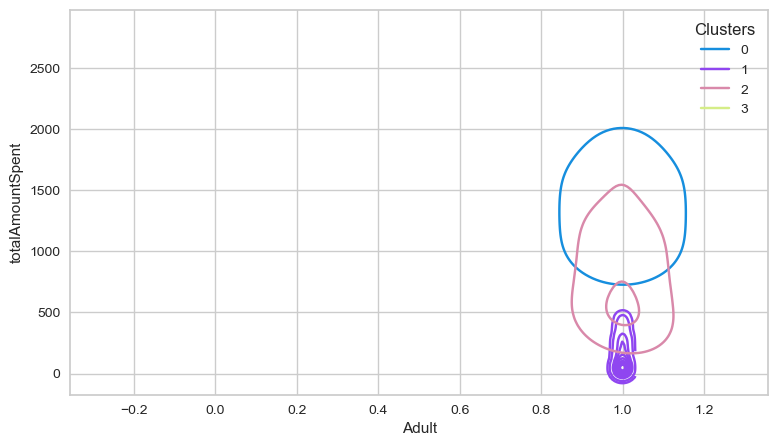

/var/folders/f8/gtjrzptn44l9ln2s4pgm_7xc0000gn/T/ipykernel_8775/1128030408.py:5: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=marketingCampData[attrColumns],y=marketingCampData['totalAmountSpent'],hue=marketingCampData["Clusters"],palette=colorsClusters)


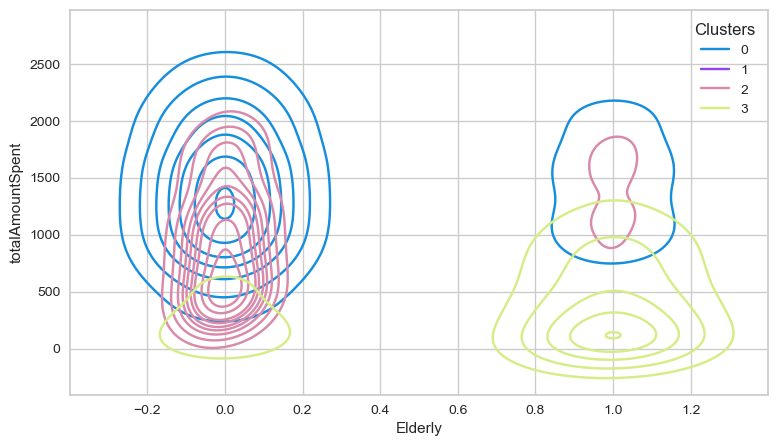

/var/folders/f8/gtjrzptn44l9ln2s4pgm_7xc0000gn/T/ipykernel_8775/1128030408.py:5: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=marketingCampData[attrColumns],y=marketingCampData['totalAmountSpent'],hue=marketingCampData["Clusters"],palette=colorsClusters)


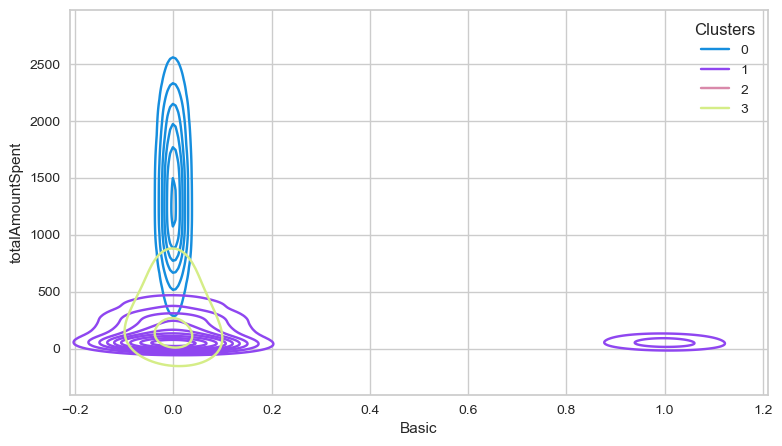

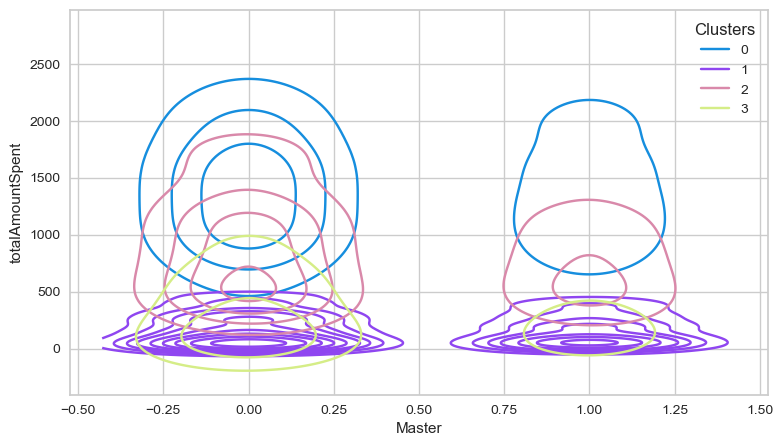

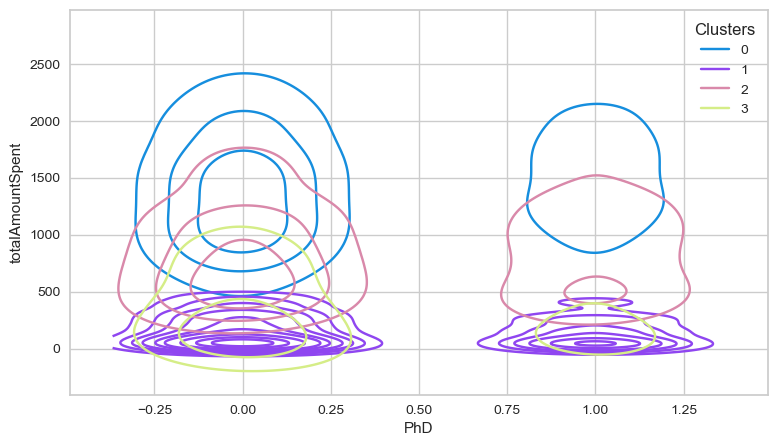

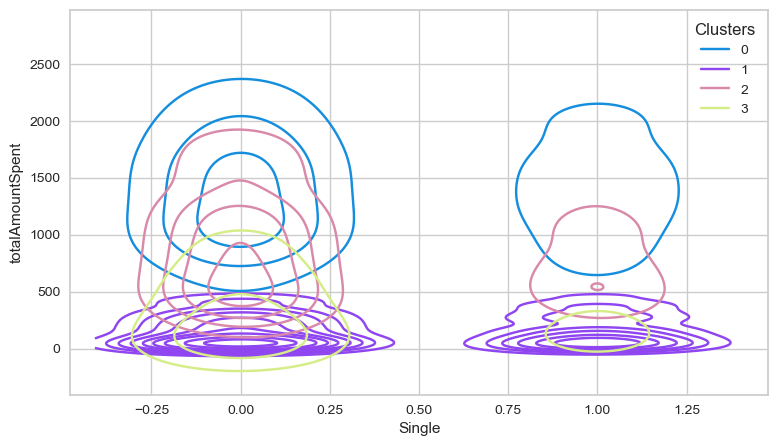

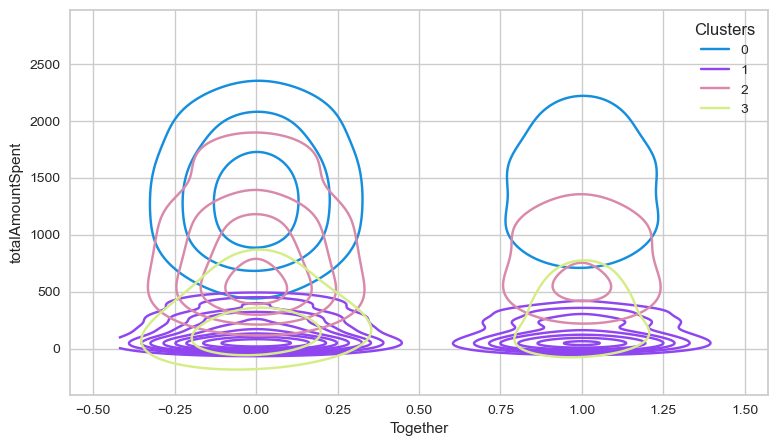

In [2498]:
densityPlotColumns= ['IsParent','Teenhome','Kidhome','Young','Adult','Elderly','Basic','Master','PhD','Single','Together']

for attrColumns in densityPlotColumns:
    plt.figure(figsize=(9,5))
    sns.kdeplot(x=marketingCampData[attrColumns],y=marketingCampData['totalAmountSpent'],hue=marketingCampData["Clusters"],palette=colorsClusters)
    plt.show()
